In [1]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 41.8 MB/s eta 0:00:00


In [2]:
! pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 36.7 MB/s eta 0:00:00


In [3]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,629 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and dire

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import koreanize_matplotlib
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from collections import Counter

from konlpy.utils import pprint
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 네이버 뉴스 데이터 수집

In [ ]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36"}

In [ ]:
soup_list = []

In [ ]:
for i in range(1,400,10):
    url = f'https://search.naver.com/search.naver?where=news&query=%EB%B0%98%EB%A0%A4%EB%8F%99%EB%AC%BC&sort=0&sm=tab_smr&nso=so:r,p:all,a:all&start={i}'
    resp = requests.get(url)
    print(resp)
    soup = BeautifulSoup(resp.text, 'html.parser')
    soup_list.append(soup)
# url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EB%B0%98%EB%A0%A4%EB%8F%99%EB%AC%BC&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=30&mynews=0&office_type=0&office_section_code=0&news_office_checked=&office_category=0&service_area=0&nso=so:r,p:all,a:all&start=31'
# resp = requests.get(url,headers=headers)

# print(resp)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [ ]:
title_list = []
news_c_list = []
date_list = []
link_list = []
content_list = []

## 제목 수집

In [ ]:
for s in soup_list:
    title = s.find_all('a', attrs = {'class' : 'news_tit'})
    for t in title:
        title_list.append(t.get_text())

In [ ]:
title_list

['다람쥐는 못간대…4천800㎞ 동행한 반려동물과 美국경 앞 생이별',
 '“상조 회사의 변신은 무죄”…결혼부터 반려동물까지 新사업 개척',
 '"반려동물 임상 지견 공부"…서울시수의사회 학술대회, 첫날 \'북적\'',
 '자세히 보아야 예쁘다, 동물도 그렇다 [고은경의 반려배려]',
 "[이지 사이언스] '조용한 팬데믹' 항생제 내성균…동물에게서 온다고?",
 '추석 연휴 반려동물 아플 땐?…전국 600여개 동물병원 응급 진료',
 '계명문화대, 올바른 반려동물 문화정착을 위해 노력 경주',
 '양평군, 반려동물 문화교실 운영',
 "생활한복부터 반려동물 한복까지…추석 맞이 '찾아가는 한복상점'",
 '[책마을] 반려동물 죽음은 어떻게 극복하나',
 "생활한복부터 반려동물 한복까지…추석 맞이 '찾아가는 한복상점'",
 '김해시, 하반기 반려동물 영업장 일제점검',
 '[책마을] 반려동물 죽음은 어떻게 극복하나',
 '유아부터 반려동물까지…쿠팡, 추석맞이 한복 최대 80% 할인',
 '반려동물 대신 반려식물을 키웁니다',
 "현대백화점, 반려동물 편집숍 '위펫' 출시…더현대 서울에 첫 매장 열어",
 '양평군, 2023 반려동물 문화교실 운영',
 '제주 첫 반려동물 산업박람회 ‘팻페어’ 열린다',
 '경복대 반려동물-예은동물병원 산학협력 MOU 체결',
 '현대백화점 "반려동물 편집숍 \'위펫\' 론칭"',
 '힙하다고 소문난 ‘봉 동물병원’에서도 보험 보장되나요[영화in 보험산책]',
 '현대百, 반려동물 편집매장 론칭…MZ 겨냥 핵심 매장으로 육성',
 "추석 황금연휴에 반려동물 '맡긴다 vs 데리고 간다'",
 '가평군, 자라섬 반려동물 문화축제',
 '하이트진로 "제주도서 반려해변 환경정화활동 진행"',
 '펫시터APP 펫봄 “반려가구 58.2%, 강아지와 반려”',
 '경복대 반려동물보건과, 예은동물병원과 산학협력 위한 업무협약 체결',
 '노바셀테크놀로지, 해마루 반려동물 의료재단과 MOU… 펩티로이드 기반의 반려...',
 '그린벳-제이비피코리아

## 신문사 수집

In [ ]:
for s in soup_list:
    news_c = s.find_all('a', attrs = {'class' : 'info press'})
    for n in news_c:
        if '언론사 선정' in n.get_text():
            new_text = n.get_text()[:-6]
            news_c_list.append(new_text)
            # print(new_text)
        else:
            news_c_list.append(n.get_text())
            # print(n.get_text())

In [ ]:
news_c_list

['연합뉴스',
 '서울경제',
 '뉴스1',
 '한국일보',
 '연합뉴스',
 '뉴시스',
 '헤럴드경제',
 '데일리안',
 '이데일리',
 '한국경제',
 '이데일리',
 '뉴시스',
 '한국경제',
 'TV조선',
 '오마이뉴스',
 '지디넷코리아',
 '메트로신문',
 '뉴시스',
 '에너지경제',
 '스포츠한국',
 '뉴스1',
 '연합뉴스',
 '머니투데이',
 '국제뉴스',
 '한국경제',
 '세계일보',
 '데일리안',
 '세계일보',
 '연합뉴스',
 '뉴스1',
 '부산일보',
 '문화일보',
 '연합뉴스',
 '디트뉴스24',
 '뉴스투데이',
 'SBS',
 '뉴시스',
 '헬스경향',
 '뉴스1',
 '부산일보',
 '한국농어민신문',
 '보안뉴스',
 '이코노미스트',
 '경향신문',
 '한국경제TV',
 '연합뉴스',
 '이코노믹리뷰',
 '천지일보',
 '뉴스1',
 '한국경제TV',
 '뉴시스',
 '뉴스1',
 '한국일보',
 '충북일보',
 '건강다이제스트',
 '주간동아',
 '노트펫',
 '매일경제',
 '로이슈',
 '경기일보',
 '국제뉴스',
 '세계일보',
 '뉴스제주',
 'KBS',
 '대구신문',
 '주간동아',
 '컨슈머타임스',
 '뉴시스',
 '뉴시스',
 '세계일보',
 '헤럴드경제',
 '노트펫',
 '경인일보',
 '연합뉴스',
 '머니투데이',
 '경상일보',
 '데일리안',
 '부산일보',
 '톱데일리',
 '서울경제',
 '채널예스',
 '경남신문',
 '굿모닝경제',
 '비즈니스포스트',
 '국제신문',
 '팜뉴스',
 '뉴시스',
 '서울신문',
 '여성소비자신문',
 '공감신문',
 '위클리오늘',
 '팝콘뉴스',
 '연합뉴스',
 '조선비즈',
 '연합뉴스',
 '뉴시스',
 '패션비즈',
 '뉴스1',
 '키즈맘',
 '뉴스1',
 '연합뉴스',
 '메트로신문',
 '이코노믹리뷰',
 '신아일보',
 '뉴시스',
 '스마트경제',
 '메트로신문',
 'KBS',
 '천지일보',
 '대

## 날짜 수집

In [ ]:
date_list = []

In [ ]:
for s in soup_list:
    date = s.find_all('span', attrs = {'class' : 'info'})
    for d in date:
        # print(d.get_text())
        if '면' in d.get_text():
            pass
        else:
            date_list.append(d.get_text())

## 링크 수집

In [ ]:
for s in soup_list:
    link = s.find_all('div', attrs = {'class' : 'info_group'})
    # .find_all('a')[1].get('href')
    for l in link:
        if len(l.find_all('a')) <= 1:
            link_list.append(None)
        else:
            # print(l.find_all('a')[1].get('href'))
            link_list.append(l.find_all('a')[1].get('href'))

## 본문 수집

In [ ]:
for url in link_list:
    try:
        resp_text = requests.get(url)
        # print(resp_text)
        soup_text = BeautifulSoup(resp_text.text, 'html.parser')
        # print(soup_text.find('article').get_text())
        content_list.append(soup_text.find('article').get_text())
    except:
        content_list.append(None)

## 데이터 프레임으로 변환

In [ ]:
print(len(title_list))
print(len(news_c_list))
# print(len(date_list))
# print(len(link_list))
# print(len(content_list))

400
400


In [ ]:
# 딕셔너리 형식으로 항목별 리스트를 원소로 추가
dict_data = {
    'title' : title_list,
    'news_c' : news_c_list
    # 'date' : date_list,
    # 'link' : link_list,
    # 'content' : content_list
}

# 판다스 데이터프레임으로 변환
df_data = pd.DataFrame(dict_data)

# 변환 결과를 확인
df_data

,title,news_c
0,다람쥐는 못간대…4천800㎞ 동행한 반려동물과 美국경 앞 생이별,연합뉴스
1,“상조 회사의 변신은 무죄”…결혼부터 반려동물까지 新사업 개척,서울경제
2,"""반려동물 임상 지견 공부""…서울시수의사회 학술대회, 첫날 '북적'",뉴스1
3,"자세히 보아야 예쁘다, 동물도 그렇다 [고은경의 반려배려]",한국일보
4,[이지 사이언스] '조용한 팬데믹' 항생제 내성균…동물에게서 온다고?,연합뉴스
...,...,...
395,"그린벳, '플라센타 정제 영양제' 제품 동물병원 공급",비지니스코리아
396,임말숙 시의원 발의 '동물 보호 및 복지에 관한 조례 일부개정 조례안' 상임위...,국제뉴스
397,“고양이 고병원성 AI 계기로 반려동물 방역 논의해야”,데일리벳
398,"대웅펫-코티티, 반려동물 건기식 품질인증제도 출범 MOU 체결",헬스경향


In [ ]:
df_data.to_csv('/content/drive/MyDrive/데이터 분석/꼬순내/data/navernews.csv', index=True)

# 노트펫 뉴스 데이터 수집

In [ ]:
notepet_soup = []

In [ ]:
for i in range(1, 22):
    url = f'https://notepet.co.kr/search/?prevSearchWord=%EB%B0%98%EB%A0%A4%EB%8F%99%EB%AC%BC&sort=correct&orderBy=desc&page={i}&searchKey=news&searchWord=%EB%B0%98%EB%A0%A4%EB%8F%99%EB%AC%BC&searchWord2=&searchWord3=&start_date=20230101&end_date=20230923&latest=all&range=all'
    resp = requests.get(url)
    print(resp)
    soup = BeautifulSoup(resp.text, 'html.parser')
    notepet_soup.append(soup)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [ ]:
title_list = []
date_list = []
content_list = []

In [ ]:
for s in notepet_soup:
    title = s.find_all('strong', attrs = {'class' : 'tit'}) # 제목
    date = s.find_all('span', attrs = {'class' : 'date'}) # 날짜
    content = s.find_all('span', attrs = {'class' : 'txt-wrap'}) # 기사내용

    # 제목
    for t in title:
        title_list.append(t.get_text())

    # 날짜
    for d in date:
        date_list.append(d.get_text())

    # 기사내용
    for c in content:
        content_list.append(c.get_text())

In [ ]:
print(len(title_list))
print(len(date_list))
print(len(content_list))

205
205
205


In [ ]:
# 딕셔너리 형식으로 항목별 리스트를 원소로 추가
dict_data = {
    'title' : title_list,
    'date' : date_list,
    'content' : content_list
}

# 판다스 데이터프레임으로 변환
notepet_data = pd.DataFrame(dict_data)

# 변환 결과를 확인
notepet_data

,title,date,content
0,"펫프렌즈, 최대 84% 할인 추석 기획전 진행...""반려동물과 풍성한 추석 보내세요""",2023.09.22,\n\n\n\n사진=펫프렌즈 제공\n\n\n반려동물 쇼핑몰 펫프렌즈(대표 윤현신)가...
1,"광진구·건국대 캠퍼스타운, '2023 반려동물 학교' 참여자 모집",2023.09.22,\n\n\n\n사진=스파크펫(놀로) 제공\n\n\n건국대학교 캠퍼스타운과 광진구청은...
2,"경북대 동물병원, 오는 23일 '2023 가을 반려동물 문화교실' 개최",2023.09.18,\n\n\n\n사진=경북대학교 수의과대학 부속 동물병원 제공(이하)\n\n\n경북대...
3,"반려동물 플랫폼 온리버디, 추석 맞이 대규모 할인 이벤트...'전제품 최대 77%'",2023.09.18,\n\n\n\n사진=온리버디 제공\n\n\n반려동물 라이프스타일 플랫폼 '온리버디(...
4,"한국반려동물영양연구소, 닥터레이 마그네타 미니 '하프패키지' 출시...'첫 급여 ...",2023.09.18,\n\n\n\n닥터레이 마그네타 미니 하프패키지[사진=한국반려동물영양연구소 제공]\...
...,...,...,...
200,우연히 사진에 찍힌 '요괴' 고양이 '놀아주면 안 잡아 먹지',2023.01.04,\n\n\n\n사진=twitter/@tirol1012 (이하)\n\n\n 우연히 찍...
201,고양이에게 정말 위험한 가전 4가지,2023.01.03,[미야옹철의 냥냥펀치] 너무나 편리한 가전제품들이지만잠깐의 방심으로 이어지는 사고들...
202,건강하게 장수하는 토끼 키우기를 위한 건강 백과..'토끼 질병의 모든 것' 출간,2023.01.02,모든 순간 곁에 두고 봐야 할토끼 건강 백과\n\n\n\n\n\n\n\n동물 전문 ...
203,제주도에 귤 따러 가요 ~~﻿? 제주 카페 '감따남',2023.01.02,"\n제주도에 감귤 체험도 할 수 있고, 포토존이 아주~ 많은 서귀포에 위치한 감따남..."


In [ ]:
notepet_data.to_csv('/content/drive/MyDrive/데이터 분석/꼬순내/data/notepetnews.csv', index=True)

# 데이터 전처리

In [5]:
notepet_df = pd.read_csv('/content/drive/MyDrive/데이터 분석/꼬순내/data/notepetnews.csv', index_col = 0)
notepet_df

,title,date,content
0,"펫프렌즈, 최대 84% 할인 추석 기획전 진행...""반려동물과 풍성한 추석 보내세요""",2023.09.22,\n\n\n\n사진=펫프렌즈 제공\n\n\n반려동물 쇼핑몰 펫프렌즈(대표 윤현신)가...
1,"광진구·건국대 캠퍼스타운, '2023 반려동물 학교' 참여자 모집",2023.09.22,\n\n\n\n사진=스파크펫(놀로) 제공\n\n\n건국대학교 캠퍼스타운과 광진구청은...
2,"경북대 동물병원, 오는 23일 '2023 가을 반려동물 문화교실' 개최",2023.09.18,\n\n\n\n사진=경북대학교 수의과대학 부속 동물병원 제공(이하)\n\n\n경북대...
3,"반려동물 플랫폼 온리버디, 추석 맞이 대규모 할인 이벤트...'전제품 최대 77%'",2023.09.18,\n\n\n\n사진=온리버디 제공\n\n\n반려동물 라이프스타일 플랫폼 '온리버디(...
4,"한국반려동물영양연구소, 닥터레이 마그네타 미니 '하프패키지' 출시...'첫 급여 ...",2023.09.18,\n\n\n\n닥터레이 마그네타 미니 하프패키지[사진=한국반려동물영양연구소 제공]\...
...,...,...,...
200,우연히 사진에 찍힌 '요괴' 고양이 '놀아주면 안 잡아 먹지',2023.01.04,\n\n\n\n사진=twitter/@tirol1012 (이하)\n\n\n 우연히 찍...
201,고양이에게 정말 위험한 가전 4가지,2023.01.03,[미야옹철의 냥냥펀치] 너무나 편리한 가전제품들이지만잠깐의 방심으로 이어지는 사고들...
202,건강하게 장수하는 토끼 키우기를 위한 건강 백과..'토끼 질병의 모든 것' 출간,2023.01.02,모든 순간 곁에 두고 봐야 할토끼 건강 백과\n\n\n\n\n\n\n\n동물 전문 ...
203,제주도에 귤 따러 가요 ~~﻿? 제주 카페 '감따남',2023.01.02,"\n제주도에 감귤 체험도 할 수 있고, 포토존이 아주~ 많은 서귀포에 위치한 감따남..."


## date 변수 전처리

In [7]:
# month 데이터 생성
notepet_df['date'] = pd.to_datetime(notepet_df['date'], format = '%Y-%m-%d')
notepet_df['month'] = notepet_df['date'].dt.month
notepet_df

,title,date,content,month
0,"펫프렌즈, 최대 84% 할인 추석 기획전 진행...""반려동물과 풍성한 추석 보내세요""",2023-09-22,\n\n\n\n사진=펫프렌즈 제공\n\n\n반려동물 쇼핑몰 펫프렌즈(대표 윤현신)가...,9
1,"광진구·건국대 캠퍼스타운, '2023 반려동물 학교' 참여자 모집",2023-09-22,\n\n\n\n사진=스파크펫(놀로) 제공\n\n\n건국대학교 캠퍼스타운과 광진구청은...,9
2,"경북대 동물병원, 오는 23일 '2023 가을 반려동물 문화교실' 개최",2023-09-18,\n\n\n\n사진=경북대학교 수의과대학 부속 동물병원 제공(이하)\n\n\n경북대...,9
3,"반려동물 플랫폼 온리버디, 추석 맞이 대규모 할인 이벤트...'전제품 최대 77%'",2023-09-18,\n\n\n\n사진=온리버디 제공\n\n\n반려동물 라이프스타일 플랫폼 '온리버디(...,9
4,"한국반려동물영양연구소, 닥터레이 마그네타 미니 '하프패키지' 출시...'첫 급여 ...",2023-09-18,\n\n\n\n닥터레이 마그네타 미니 하프패키지[사진=한국반려동물영양연구소 제공]\...,9
...,...,...,...,...
200,우연히 사진에 찍힌 '요괴' 고양이 '놀아주면 안 잡아 먹지',2023-01-04,\n\n\n\n사진=twitter/@tirol1012 (이하)\n\n\n 우연히 찍...,1
201,고양이에게 정말 위험한 가전 4가지,2023-01-03,[미야옹철의 냥냥펀치] 너무나 편리한 가전제품들이지만잠깐의 방심으로 이어지는 사고들...,1
202,건강하게 장수하는 토끼 키우기를 위한 건강 백과..'토끼 질병의 모든 것' 출간,2023-01-02,모든 순간 곁에 두고 봐야 할토끼 건강 백과\n\n\n\n\n\n\n\n동물 전문 ...,1
203,제주도에 귤 따러 가요 ~~﻿? 제주 카페 '감따남',2023-01-02,"\n제주도에 감귤 체험도 할 수 있고, 포토존이 아주~ 많은 서귀포에 위치한 감따남...",1


In [18]:
# 월 별 분리
jan_df = notepet_df[notepet_df['month'] == 1]
feb_df = notepet_df[notepet_df['month'] == 2]
mar_df = notepet_df[notepet_df['month'] == 3]
apr_df = notepet_df[notepet_df['month'] == 4]
may_df = notepet_df[notepet_df['month'] == 5]
jun_df = notepet_df[notepet_df['month'] == 6]
jul_df = notepet_df[notepet_df['month'] == 7]
aug_df = notepet_df[notepet_df['month'] == 8]
sep_df = notepet_df[notepet_df['month'] == 9]

## content 변수 전처리

In [31]:
def make_count(df):
    content = []
    okt = Okt()

    stopword_list = ['반려', '반려견','반려동물', '사진', '제공', '지난', '위해', '경우', '이하', '통해', '이번', '모든', '다른', '바로', '때문',
                 '또한', '모두', '대한', '이후']


    for c in df['content']:
        tokens_n = okt.nouns(c) # 명사추출
# count_n = Counter(tokens_n)

        new_token = []
        one_word_token = []

        for n in tokens_n:
            if len(n) > 1:
                new_token.append(n)
            else:
                one_word_token.append(n)

        clean_token = []
        trash_token = []

        for n in new_token:
            if n in stopword_list:
                pass
            else:
                clean_token.append(n)

        content.append(clean_token)

    contents = []

    for c in content:
        article = ''
        for i in c:
            article = article + ' ' + i
        contents.append(article)

    as_one = ''

    for content in contents:
        as_one = as_one + ' ' + content
    words = as_one.split()

    counts = Counter(words)
    return contents, counts

In [32]:
# 전체기사
total_content, total_count = make_count(notepet_df)

# 월 별 기사
jan_content, jan_count = make_count(jan_df)
feb_content, feb_count = make_count(feb_df)
mar_content, mar_count = make_count(mar_df)
apr_content, apr_count = make_count(apr_df)
may_content, may_count = make_count(may_df)
jun_content, jun_count = make_count(jun_df)
jul_content, jul_count = make_count(jul_df)
aug_content, aug_count = make_count(aug_df)
sep_content, sep_count = make_count(sep_df)

# 데이터 시각화

## 신문사 별 개수 시각화

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/데이터 분석/꼬순내/data/navernews.csv', index_col = 0)
df

,title,news_c
0,다람쥐는 못간대…4천800㎞ 동행한 반려동물과 美국경 앞 생이별,연합뉴스
1,“상조 회사의 변신은 무죄”…결혼부터 반려동물까지 新사업 개척,서울경제
2,"""반려동물 임상 지견 공부""…서울시수의사회 학술대회, 첫날 '북적'",뉴스1
3,"자세히 보아야 예쁘다, 동물도 그렇다 [고은경의 반려배려]",한국일보
4,[이지 사이언스] '조용한 팬데믹' 항생제 내성균…동물에게서 온다고?,연합뉴스
...,...,...
395,"그린벳, '플라센타 정제 영양제' 제품 동물병원 공급",비지니스코리아
396,임말숙 시의원 발의 '동물 보호 및 복지에 관한 조례 일부개정 조례안' 상임위...,국제뉴스
397,“고양이 고병원성 AI 계기로 반려동물 방역 논의해야”,데일리벳
398,"대웅펫-코티티, 반려동물 건기식 품질인증제도 출범 MOU 체결",헬스경향


In [ ]:
df['news_c'].value_counts()

뉴스1        28
연합뉴스       25
뉴시스        20
세계일보        7
이코노믹리뷰      6
           ..
노컷뉴스        1
이슈앤비즈       1
굿모닝충청       1
경남도민신문      1
비지니스코리아     1
Name: news_c, Length: 169, dtype: int64

In [ ]:
df['news_c'].value_counts().to_frame().head(10)

,news_c
뉴스1,28
연합뉴스,25
뉴시스,20
세계일보,7
이코노믹리뷰,6
서울경제,6
헤럴드경제,6
데일리안,5
국제뉴스,5
노트펫,5


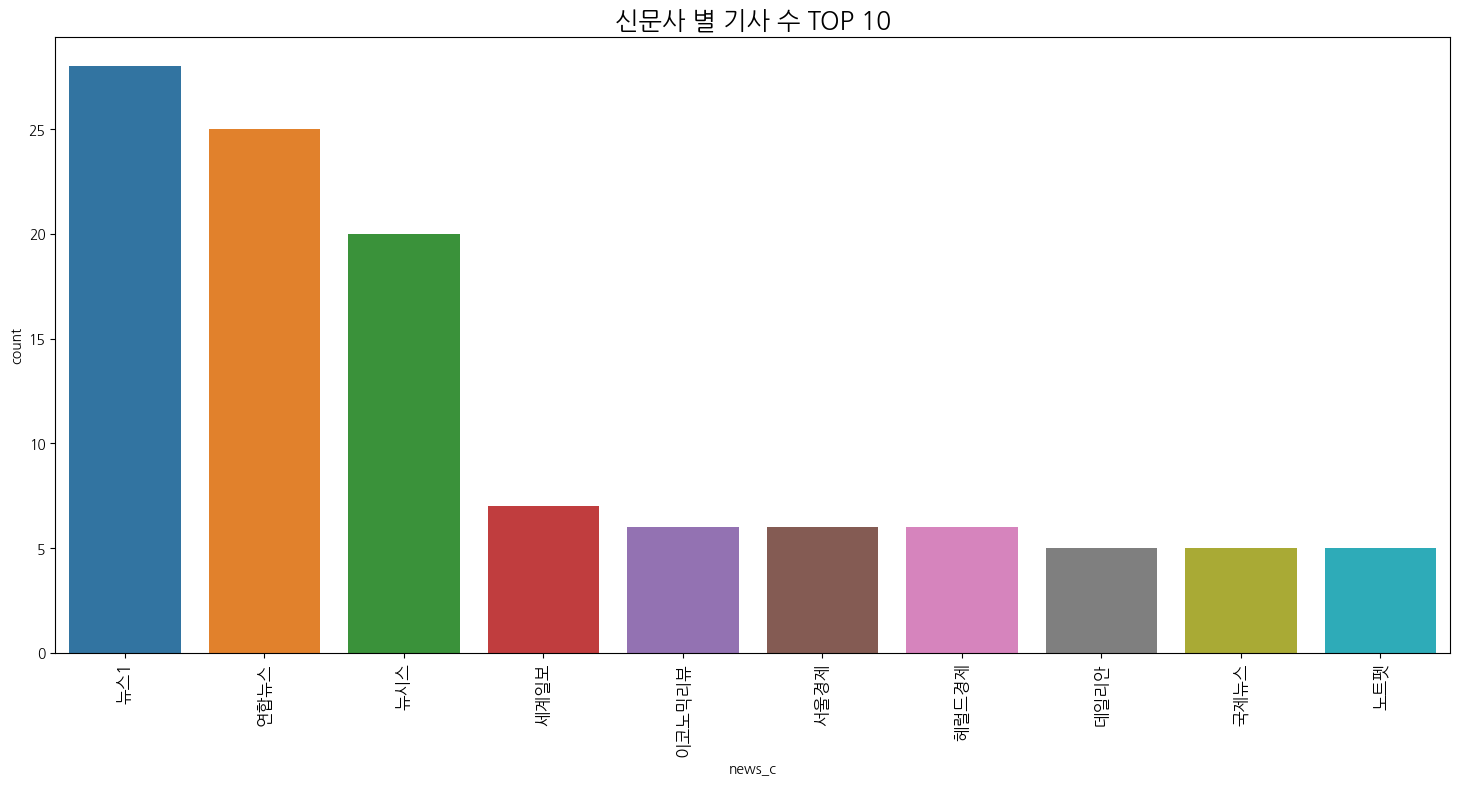

In [ ]:
plt.figure(figsize = (18, 8))
sns.countplot(data = df, x = 'news_c', order = df['news_c'].value_counts().head(10).index)
plt.xticks(rotation=90, size = 12)
plt.title('신문사 별 기사 수 TOP 10', size = 18)
plt.show()

## wordcloud

In [13]:
def show_wordcloud(counts):
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 나눔 고딕 폰트 경로

    # WordCloud 생성 및 한글 폰트 설정
    wordcloud = WordCloud(font_path=font_path, max_font_size=40, relative_scaling=0.5).generate_from_frequencies(counts)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

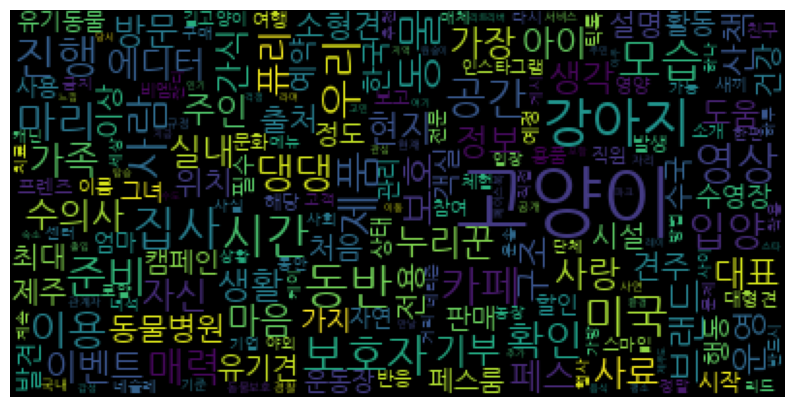

In [14]:
show_wordcloud(total_count)

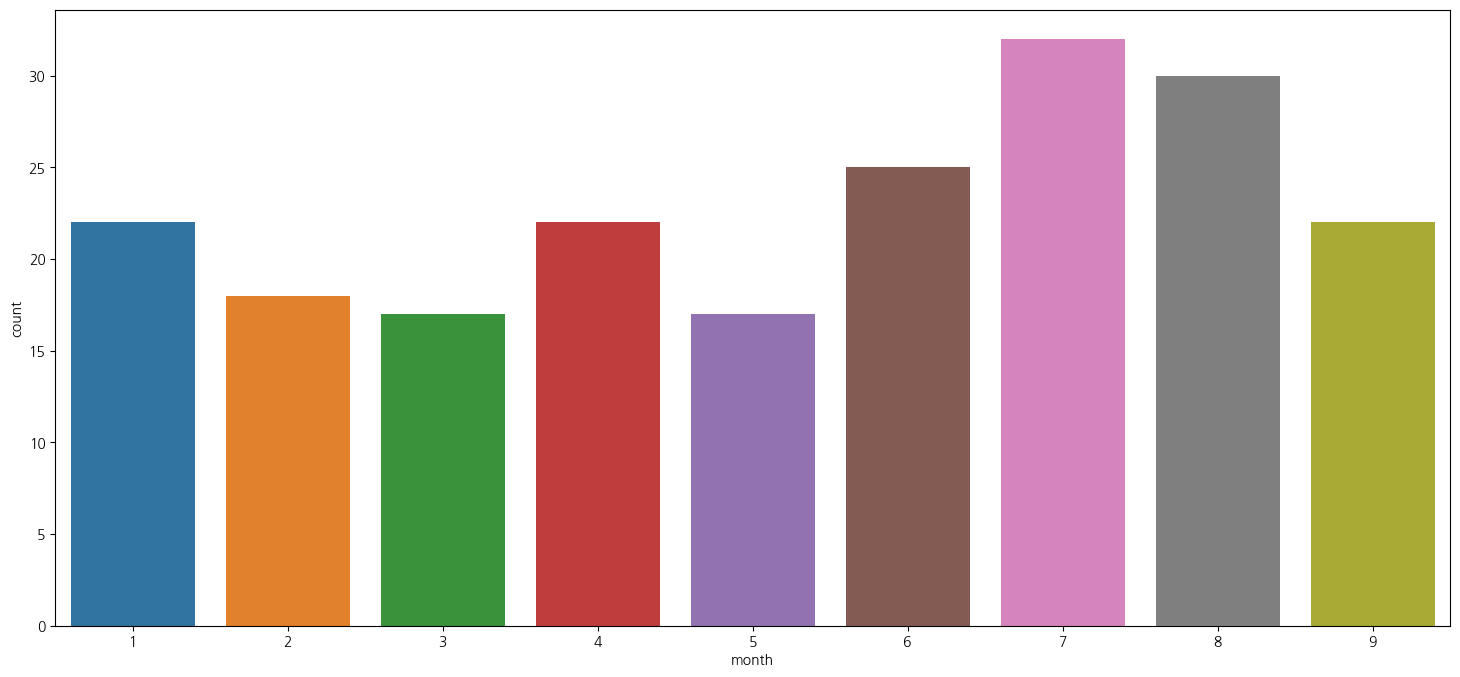

In [16]:
# 월 별 기사 개수
plt.figure(figsize=(18,8))
sns.countplot(data = notepet_df, x = 'month')
plt.show()

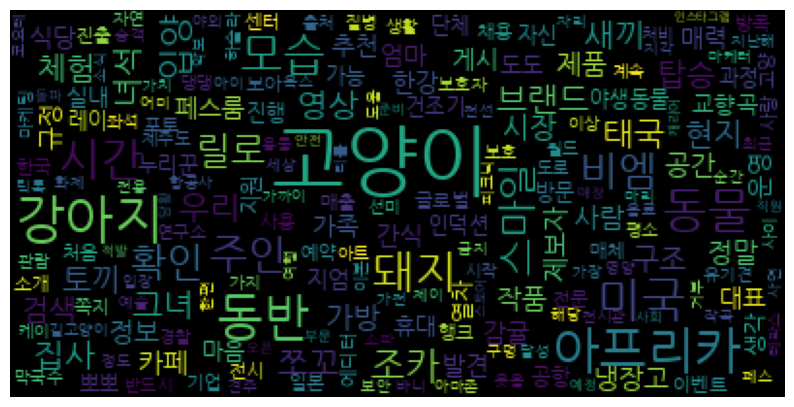

In [34]:
show_wordcloud(jan_count)

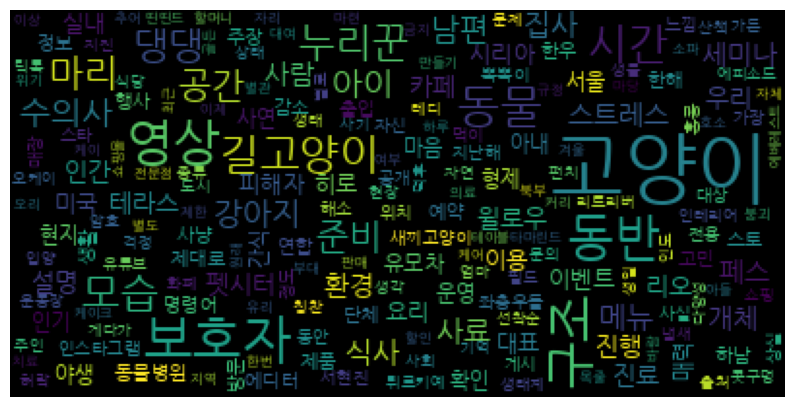

In [35]:
show_wordcloud(feb_count)

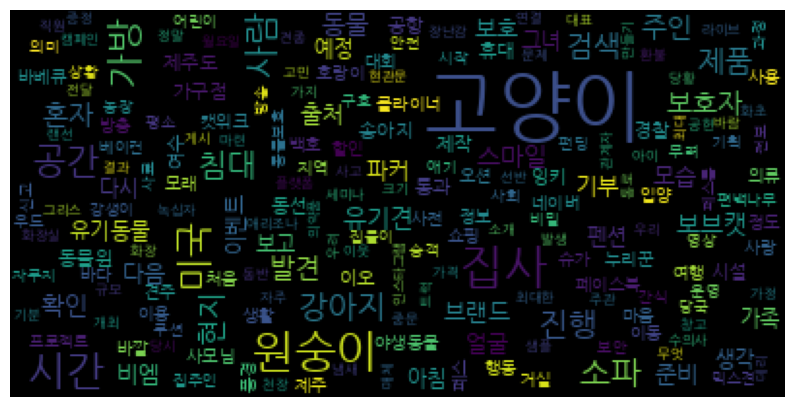

In [36]:
show_wordcloud(mar_count)

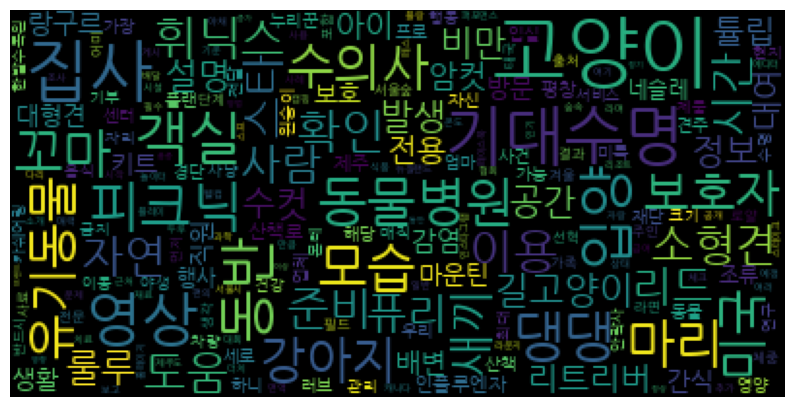

In [38]:
show_wordcloud(apr_count)

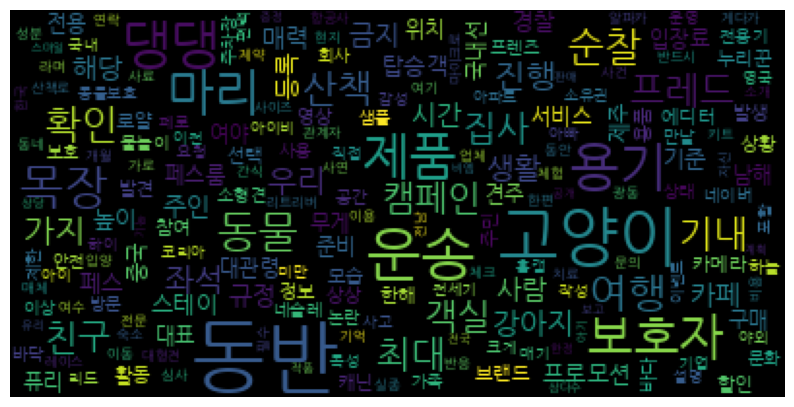

In [39]:
show_wordcloud(may_count)

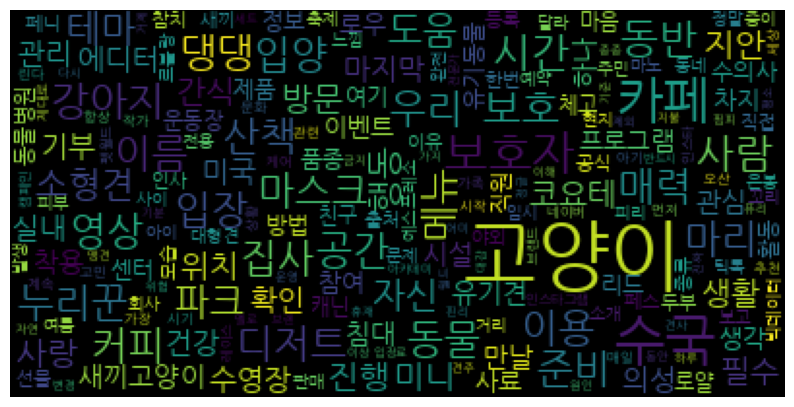

In [40]:
show_wordcloud(jun_count)

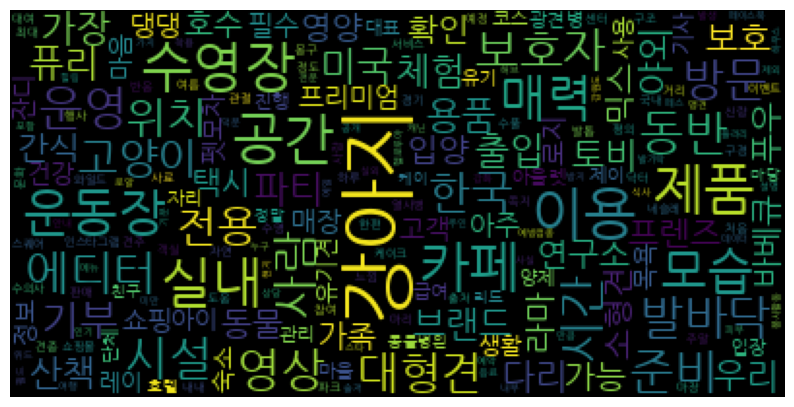

In [41]:
show_wordcloud(jul_count)

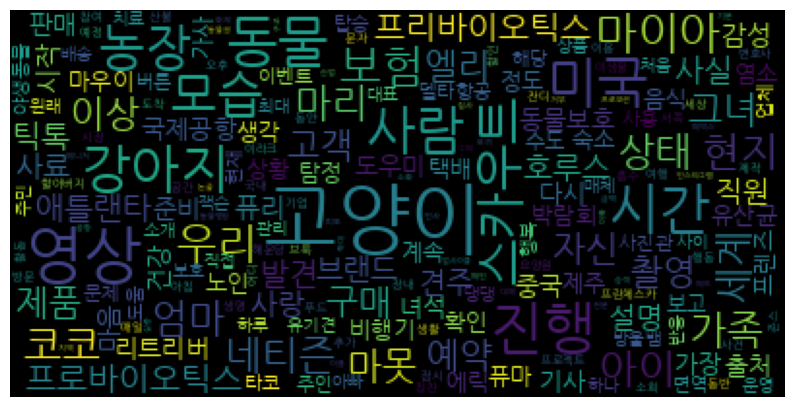

In [42]:
show_wordcloud(aug_count)

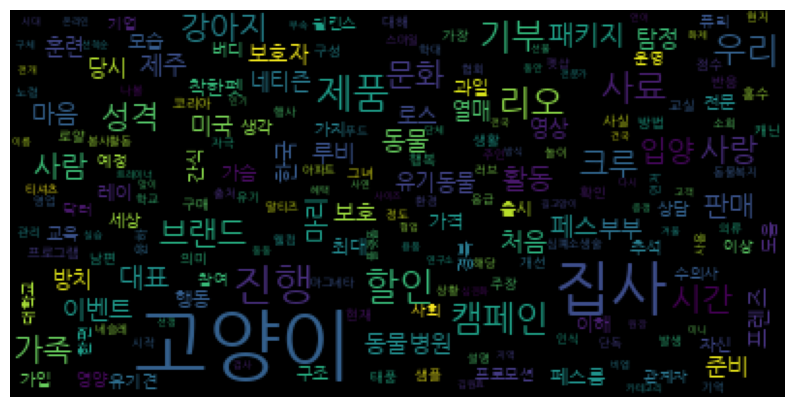

In [43]:
show_wordcloud(sep_count)

## TF-IDF / t-SNE를 활용

In [169]:
vocab = sorted(total_count, key = total_count.get, reverse=True)
word2idx = {word.encode("utf8").decode("utf8"): ii for ii, word in enumerate(vocab,1)}
idx2word = {ii: word for ii, word in enumerate(vocab)}

In [170]:
V = len(word2idx)
N = len(total_content)

In [171]:
tf = CountVectorizer()

tf.fit_transform(total_content)

<205x6258 sparse matrix of type '<class 'numpy.int64'>'
	with 21228 stored elements in Compressed Sparse Row format>

In [172]:
tf.fit_transform(total_content)[1:2].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [173]:
tfidf = TfidfVectorizer(max_features = 200)

A_tfidf_sp = tfidf.fit_transform(total_content)  #size D x V

In [174]:
tfidf_dict = tfidf.get_feature_names_out()
print(tfidf_dict)

['가능' '가방' '가장' '가족' '가지' '간식' '감성' '강아지' '객실' '거리' '건강' '게시' '견주' '경찰'
 '계속' '고객' '고민' '고양이' '공간' '공개' '관계자' '관리' '관심' '구매' '구조' '국내' '규정' '그녀'
 '금지' '기부' '기업' '기준' '길고양이' '네슬레' '네티즌' '녀석' '농장' '누리꾼' '느낌' '다시' '다음'
 '단체' '당시' '대표' '대형견' '댕댕' '도움' '동물' '동물병원' '동물보호' '동반' '동안' '라며' '레이'
 '로얄' '리드' '리트리버' '마리' '마음' '만날' '매력' '매체' '메뉴' '모습' '문제' '문화' '미국' '반드시'
 '반응' '발견' '발생' '방문' '방법' '보고' '보호' '보호자' '브랜드' '비엠' '사람' '사랑' '사료' '사실'
 '사연' '사용' '사이' '사회' '산책' '상태' '상황' '새끼' '생각' '생활' '서비스' '설명' '세상' '센터'
 '소개' '소형견' '수국' '수도' '수영장' '수의사' '숙소' '스마일' '스타' '시간' '시설' '시작' '실내' '아이'
 '아주' '야외' '엄마' '에디터' '여기' '여행' '영상' '영양' '예약' '예정' '용품' '우리' '운동장' '운송'
 '운영' '원숭이' '위치' '유기견' '유기동물' '음식' '이동' '이름' '이벤트' '이상' '이용' '인기' '인스타그램'
 '입양' '입장' '자리' '자신' '자연' '잔디' '전문' '전용' '정도' '정말' '정보' '제주' '제주도' '제품'
 '주민' '주인' '준비' '지금' '지역' '직원' '직접' '진행' '집사' '착용' '참여' '처음' '체험' '최대'
 '추가' '추천' '출입' '출처' '치료' '친구' '카페' '캐닌' '캠페인' '케이' '탑승' '틱톡' '파크' '판매'
 '페스' '페스룸' '페이스북' '평소' '포함' '퓨리' '프렌즈' '필수' '하나' '하루' '한

In [175]:
data_array = A_tfidf_sp.toarray()
data = pd.DataFrame(data_array, columns = tfidf_dict)
data.shape

(205, 200)

In [176]:
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)

In [177]:
data_array.shape

(205, 200)

In [178]:
data_array.T.shape

(200, 205)

In [179]:
Z = tsne.fit_transform(data_array.T)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.299608
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.919182
[t-SNE] KL divergence after 1300 iterations: 0.879385


In [180]:
print(Z[0:5])
print('Top words: ', len(Z))

[[ 0.01505953 -1.9139755 ]
 [ 3.0599291  -2.7600605 ]
 [ 0.00547049  0.60458505]
 [ 0.8127498   2.3232071 ]
 [ 1.9162562  -0.7948986 ]]
Top words:  200


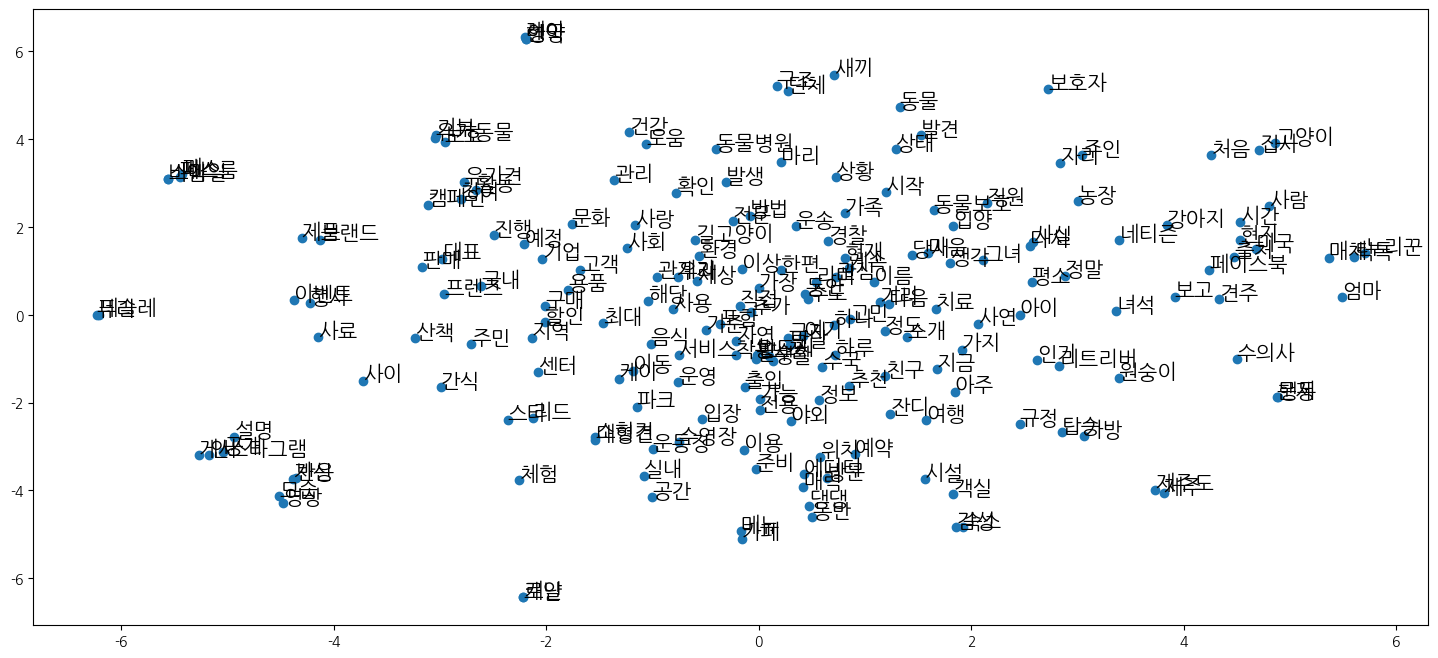

In [183]:
plt.figure(figsize = (18, 8))
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_dict)):
    plt.annotate(text=tfidf_dict[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]),fontsize = 15)

plt.draw()

참고 : https://donghwa-kim.github.io/TFIDF.html